<a href="https://colab.research.google.com/github/anjithababuraj/CognoRise-Infotech/blob/main/TASK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 3 - SPAM EMAIL DETECTION**

model to classify emails as spam or ham based on their
content

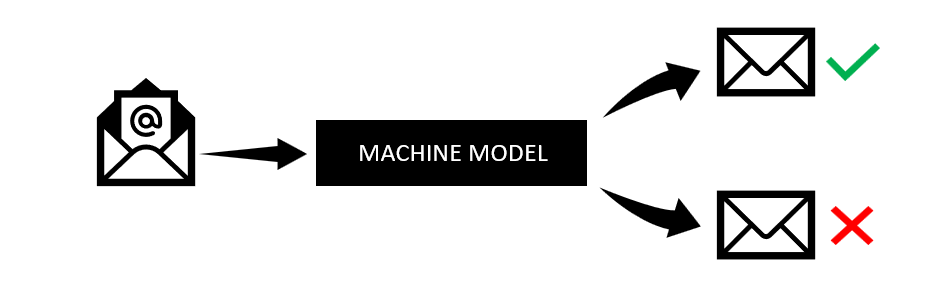

In [ ]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

In [ ]:
#data loading
data=pd.read_csv('/content/spam.csv')
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
data.shape

(5572, 2)

In [ ]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
data.dtypes

Category    object
Message     object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data['Category'].unique()

array(['ham', 'spam'], dtype=object)

<Axes: xlabel='count', ylabel='Category'>

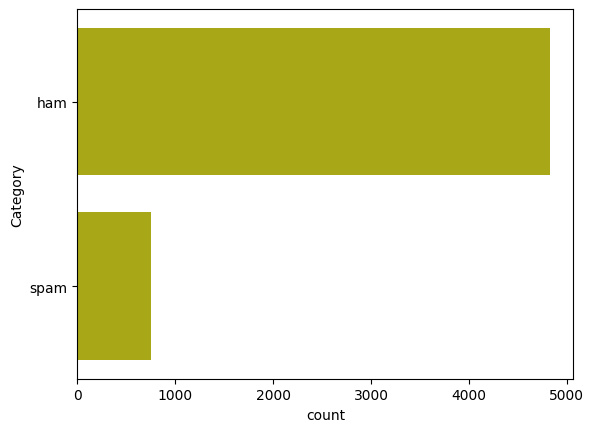

In [ ]:
sns.countplot(data['Category'],color='y')

In [ ]:
data['Category']=data['Category'].map({'ham':0,'spam':1})
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
ham=data[data['Category']==0]
spam=data[data['Category']==1]
print(ham.shape)
print(spam.shape)

(4825, 2)
(747, 2)


In [ ]:
spam1= spam.sample(4825, replace=True)
new_data= pd.concat([spam1, ham], axis=0)
print(new_data['Category'].value_counts())

Category
1    4825
0    4825
Name: count, dtype: int64


In [ ]:
new_data.reset_index(drop=True,inplace=True)

<Axes: ylabel='count'>

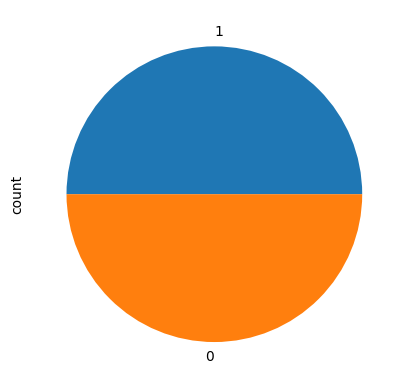

In [ ]:
new_data['Category'].value_counts().plot(kind='pie')

In [ ]:
tweets=new_data['Message']
tweets

0       FREE for 1st week! No1 Nokia tone 4 ur mob eve...
1       URGENT! Your mobile No 07xxxxxxxxx won a £2,00...
2       Want to funk up ur fone with a weekly new tone...
3       Guess who am I?This is the first time I create...
4       Sunshine Quiz! Win a super Sony DVD recorder i...
                              ...                        
9645                                         Huh y lei...
9646                 Will ü b going to esplanade fr home?
9647    Pity, * was in mood for that. So...any other s...
9648    The guy did some bitching but I acted like i'd...
9649                           Rofl. Its true to its name
Name: Message, Length: 9650, dtype: object

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
#splitting into tokens(tokenization)
from nltk import TweetTokenizer
tokens=TweetTokenizer()
tweets=tweets.apply(lambda x:tokens.tokenize(x)).apply(lambda x:' '.join(x))
tweets

0       FREE for 1st week ! No1 Nokia tone 4 ur mob ev...
1       URGENT ! Your mobile No 07xxxxxxxxx won a £ 2,...
2       Want to funk up ur fone with a weekly new tone...
3       Guess who am I ? This is the first time I crea...
4       Sunshine Quiz ! Win a super Sony DVD recorder ...
                              ...                        
9645                                        Huh y lei ...
9646                Will ü b going to esplanade fr home ?
9647    Pity , * was in mood for that . So ... any oth...
9648    The guy did some bitching but I acted like i'd...
9649                          Rofl . Its true to its name
Name: Message, Length: 9650, dtype: object

In [ ]:
#by substitution method replacing regular expression with ''
tweets=tweets.str.replace('[^a-zA-z0-9]+','')

In [ ]:
#removing words which has length less than 3
from nltk import word_tokenize
tweets=tweets.apply(lambda x:[i for i in word_tokenize(x) if len(i)>=3]).apply(lambda x:' '.join(x))
tweets

0       FREE for 1st week No1 Nokia tone mob every wee...
1       URGENT Your mobile 07xxxxxxxxx won 2,000 bonus...
2       Want funk fone with weekly new tone reply TONE...
3       Guess who This the first time created web page...
4       Sunshine Quiz Win super Sony DVD recorder you ...
                              ...                        
9645                                          Huh lei ...
9646                            Will going esplanade home
9647     Pity was mood for that ... any other suggestions
9648    The guy did some bitching but acted like inter...
9649                               Rofl Its true its name
Name: Message, Length: 9650, dtype: object

In [ ]:
#stemming
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
tweets=tweets.apply(lambda x:[stemmer.stem(i.lower()) for i in tokens.tokenize(x)]).apply(lambda x:' '.join(x))
tweets

0       free for 1st week no1 nokia tone mob everi wee...
1       urgent your mobil 07xxxxxxxxx won 2,000 bonus ...
2       want funk fone with week new tone repli tone t...
3       guess who this the first time creat web page w...
4       sunshin quiz win super soni dvd record you can...
                              ...                        
9645                                          huh lei ...
9646                                will go esplanad home
9647         piti was mood for that ... ani other suggest
9648    the guy did some bitch but act like interest b...
9649                                 rofl it true it name
Name: Message, Length: 9650, dtype: object

In [ ]:
#removing stopwords
from nltk.corpus import stopwords
sw=stopwords.words('english')
tweets=tweets.apply(lambda x:[i for i in tokens.tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))
tweets

0       free 1st week no1 nokia tone mob everi week tx...
1       urgent mobil 07xxxxxxxxx 2,000 bonus caller pr...
2       want funk fone week new tone repli tone text w...
3       guess first time creat web page www.asjesus.co...
4       sunshin quiz win super soni dvd record cannam ...
                              ...                        
9645                                          huh lei ...
9646                                     go esplanad home
9647                            piti mood ... ani suggest
9648    guy bitch act like interest buy someth els nex...
9649                                       rofl true name
Name: Message, Length: 9650, dtype: object

In [ ]:
#vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vectors=TfidfVectorizer()
Text=vectors.fit_transform(tweets)
print(Text.shape)
print(Text)

(9650, 7082)
  (0, 352)	0.14166639909885148
  (0, 4474)	0.23029227554936377
  (0, 6724)	0.24196815916305928
  (0, 529)	0.23606508832450862
  (0, 4892)	0.16896520939087395
  (0, 6524)	0.1619860237526078
  (0, 1857)	0.1662085089985246
  (0, 2956)	0.22413926503684156
  (0, 6978)	0.13900330189000784
  (0, 4073)	0.20747161039367643
  (0, 6189)	0.17396584727381778
  (0, 6503)	0.2193520132325092
  (0, 2950)	0.12547126627345848
  (0, 739)	0.2129426555772707
  (0, 6497)	0.12264949348337541
  (0, 2558)	0.17194107549846524
  (0, 4215)	0.19216628552909906
  (0, 6381)	0.32638479323145814
  (0, 4460)	0.3179603822541501
  (0, 4451)	0.22962944133475907
  (0, 6800)	0.2958676809602843
  (0, 395)	0.18783603285493278
  (0, 2832)	0.11586577410176004
  (1, 356)	0.20267617830389095
  (1, 840)	0.3138887839963053
  :	:
  (9644, 2950)	0.2124275563370244
  (9645, 3810)	0.7003917983833767
  (9645, 3326)	0.7137585927730042
  (9646, 2538)	0.7736508162423571
  (9646, 2987)	0.445569719800569
  (9646, 3265)	0.45047978

In [ ]:
x=Text
print(x.shape)

(9650, 7082)


In [ ]:
y=new_data['Category'].values
print(y.shape)

(9650,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
print(x_train.shape)
print(x_train)

(6755, 7082)
  (0, 76)	0.38973013910356336
  (0, 3038)	0.28346382942790677
  (0, 4621)	0.26083189306883453
  (0, 4277)	0.1911227436342799
  (0, 630)	0.19069227560431176
  (0, 6399)	0.2589340697634546
  (0, 4783)	0.21123317528865362
  (0, 4824)	0.18778569076115875
  (0, 5962)	0.16774340856192219
  (0, 5519)	0.17594575915914965
  (0, 5323)	0.22021194549327797
  (0, 5266)	0.1718421155195503
  (0, 2950)	0.15576282247591355
  (0, 2558)	0.21345147789307375
  (0, 6381)	0.4051813464299395
  (0, 6800)	0.18364836202950482
  (0, 395)	0.23318383171806578
  (0, 2832)	0.14383835071141257
  (1, 1670)	0.2985570780125871
  (1, 5053)	0.40243697867110917
  (1, 2200)	0.32508763323222556
  (1, 4800)	0.31603347293255263
  (1, 2502)	0.2999798022753362
  (1, 632)	0.2767845263490112
  (1, 256)	0.4055947565372604
  :	:
  (6751, 1609)	0.17457913530063987
  (6751, 6600)	0.26370211681209765
  (6752, 4716)	0.5321107330740167
  (6752, 3785)	0.2963448173598043
  (6752, 5487)	0.2561021476334237
  (6752, 5339)	0.512204

In [ ]:
print(x_test.shape)
print(x_test)

(2895, 7082)
  (0, 107)	0.37624114059460445
  (0, 4359)	0.3002931935521676
  (0, 2414)	0.2637519681307391
  (0, 3008)	0.20985495824193745
  (0, 1570)	0.2866403344130424
  (0, 6232)	0.23311282924695242
  (0, 4177)	0.25658765200739825
  (0, 1940)	0.2686487096951405
  (0, 6988)	0.25614711734210416
  (0, 306)	0.23311282924695242
  (0, 4783)	0.21116885660362256
  (0, 4597)	0.17309294352540394
  (0, 1816)	0.17164722636281088
  (0, 2851)	0.23127973297268203
  (0, 1632)	0.11117117762588047
  (0, 5024)	0.18518392346704568
  (0, 1)	0.2367217386641561
  (1, 155)	0.4726231908614792
  (1, 4982)	0.43733439107891037
  (1, 813)	0.4726231908614792
  (1, 809)	0.4726231908614792
  (1, 4824)	0.2425035492600967
  (1, 5539)	0.2432883545248581
  (1, 1632)	0.1436084743607535
  (2, 378)	0.2585743110621518
  :	:
  (2893, 340)	0.2677753081578066
  (2893, 6498)	0.28333808002353134
  (2893, 470)	0.28333808002353134
  (2893, 4138)	0.28333808002353134
  (2893, 5256)	0.21926857274120068
  (2893, 6614)	0.1801888932582

In [ ]:
print(y_train.shape)
print(y_train)

(6755,)
[1 1 1 ... 0 1 0]


In [ ]:
print(y_test.shape)
print(y_test)

(2895,)
[1 1 1 ... 1 1 0]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
l_model=LogisticRegression()
l_model.fit(x_train,y_train)
y_pred=l_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1433
           1       0.99      0.99      0.99      1462

    accuracy                           0.99      2895
   macro avg       0.99      0.99      0.99      2895
weighted avg       0.99      0.99      0.99      2895



In [ ]:
from sklearn.ensemble import RandomForestClassifier
r_model=RandomForestClassifier()
r_model.fit(x_train,y_train)
y_pred=r_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1433
           1       1.00      1.00      1.00      1462

    accuracy                           1.00      2895
   macro avg       1.00      1.00      1.00      2895
weighted avg       1.00      1.00      1.00      2895



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
clf=KNeighborsClassifier()
pmtr={'n_neighbors':[3,5,7,9,11],'weights':['uniform','distance']}
gd=GridSearchCV(clf,pmtr,cv=10,scoring='accuracy')  # CV = CrossValidation
gd.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print(gd.best_params_)

{'n_neighbors': 3, 'weights': 'distance'}


[[1433    0]
 [   8 1454]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1433
           1       1.00      0.99      1.00      1462

    accuracy                           1.00      2895
   macro avg       1.00      1.00      1.00      2895
weighted avg       1.00      1.00      1.00      2895



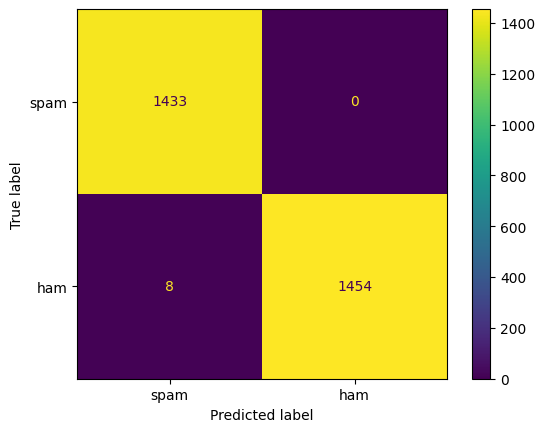

In [ ]:
k_model=KNeighborsClassifier(n_neighbors=3,weights='distance')
k_model.fit(x_train,y_train)
y_pred=k_model.predict(x_test)
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
mat=confusion_matrix(y_test,y_pred)
print(mat)
dis=ConfusionMatrixDisplay(mat,display_labels=['spam','ham'])
dis.plot()
print(classification_report(y_test,y_pred))